# **Naïve Bayes to Predict if a Transaction is Fraudulent or Not (Binary Classification)**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import dependancies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

Read csv (dataset) file

In [4]:
df = pd.read_csv("/content/drive/MyDrive/B.Sc. Hons. CS & IT/4. AI/Fraud Detection/2. Naïve Bayes/creditcard.csv")

Split dataset into x train (features) and y train (targets)

In [5]:
# we exclude the firs feature it is the number of seconds elapsed between this transaction and the first transaction in the data set
X = df.iloc[:, 1:-1] # Removes last (classificatio/target) column of the dataframe
Y = df.iloc[:, -1] # Gets the last (classification/target) column of the dataframe

Convert pandas dataframe to numpy array

In [6]:
X = X.values
Y = Y.values

Initialise KFold cross-validation

In [7]:
k = 5

# K-fold
kf = KFold(n_splits = k, shuffle = True, random_state=42)

Initialise list to store the accuracies for each fold

In [8]:
accuracies = []

We define a class with all of the functions we need to perform the Naive Bayes machine learning algorithm

In [9]:
class NaiveBayes():

    def fit(self, X, y):  # train the model
        numSamples, numFeatures = X.shape # samples are the entries in our dataset
        # putting "self." before the variable name makes it accessible throughout the class
        self._classes = np.unique(y) # gets the classes 1 (fraudulent) and 0 (non-fraudulent) and saves it in a numpy array
        numClasses = len(self._classes) # _ before variable name means it is private and not meant to be accessed or modified outside of the class

        # initialising numpy arrays to store the mean, variance, and prior of each class
        self._mean = np.zeros((numClasses, numFeatures), dtype=np.float64)
        self._var = np.zeros((numClasses, numFeatures), dtype=np.float64)
        self._priors = np.zeros(numClasses, dtype=np.float64)

        for idx, c in enumerate(self._classes): # "for each class (0 or 1)"
            Xc = X[y == c] # we get all the data entries of the same class in one array
            self._mean[idx, :] = Xc.mean(axis=0) # calculating the mean for all the features of the entire class
            self._var[idx, :] = Xc.var(axis=0) + 1e-9  # small epsilon to avoid division by zero
            self._priors[idx] = Xc.shape[0] / float(numSamples) # calculates the prior probability of the class

        np.set_printoptions(threshold=2, edgeitems=1)
        # for each of the following two arrays will be printed one for class 0 (non-fraudulent) and another for class 1 (fraudulent)
        print(f"CLASS MEANS:\n{self._mean}")
        print(f"\nCLASS VARIANCES:\n{self._var}")
        print(f"\nCLASS PRIORS:\n{self._priors}")

    def predict(self, X): # makes a numpy array of all the predictions
        yPred = [self._predict(x) for x in X]
        return np.array(yPred)

    def _predict(self, x): # makes predictions form
        posteriors = [] # array to store the posteriors for each class
        # calculate the posterior probabilities for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx]) # log the prior
            likelihood = np.sum(np.log(self._pdf(idx, x)))
            # calculate final posterior
            posterior = likelihood + prior # we can add togeter like this because of log rules
            posteriors.append(posterior)

        # return class (out of the 2) with the highest posterior
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x): # calculate probability using Gaussian density function
        mean = self._mean[class_idx] # class 0 or class 1
        var = self._var[class_idx]
        numerator = np.exp(-(x - mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        pdf_values = numerator / denominator
        return np.clip(pdf_values, 1e-9, None) # .clip ensures no zero values

def accuracy(yTarget, yPred):
    return np.sum(yTarget == yPred) / len(yTarget)


We can now execute the algorithm by making use of k-fold cross-validation

CLASS MEANS:
[[ 8.68471890e-03 ...  8.84395954e+01]
 [-4.48394790e+00 ...  1.11800939e+02]]

CLASS VARIANCES:
[[3.73364912e+00 ... 6.50017955e+04]
 [4.22344513e+01 ... 5.71504952e+04]]

CLASS PRIORS:
[0.99827075 0.00172925]

FOLD 1 ACCURACY IS: 0.9789157684070082


CLASS MEANS:
[[ 4.07208435e-03 ...  8.84334992e+01]
 [-4.76909280e+00 ...  1.32294812e+02]]

CLASS VARIANCES:
[[3.75181177e+00 ... 6.30484783e+04]
 [4.78906551e+01 ... 7.54616318e+04]]

CLASS PRIORS:
[0.99824881 0.00175119]

FOLD 2 ACCURACY IS: 0.9795828798146132


CLASS MEANS:
[[ 8.24260338e-03 ...  8.85994007e+01]
 [-4.71743136e+00 ...  1.19742015e+02]]

CLASS VARIANCES:
[[3.72611600e+00 ... 6.52886233e+04]
 [4.51533888e+01 ... 6.63572014e+04]]

CLASS PRIORS:
[0.9982576 0.0017424]

FOLD 3 ACCURACY IS: 0.9797756359614473


CLASS MEANS:
[[ 8.53826025e-03 ...  8.81580231e+01]
 [-4.99868919e+00 ...  1.20657621e+02]]

CLASS VARIANCES:
[[3.71544786e+00 ... 6.24208805e+04]
 [4.71621912e+01 ... 5.84414065e+04]]

CLASS PRIORS:
[0.9

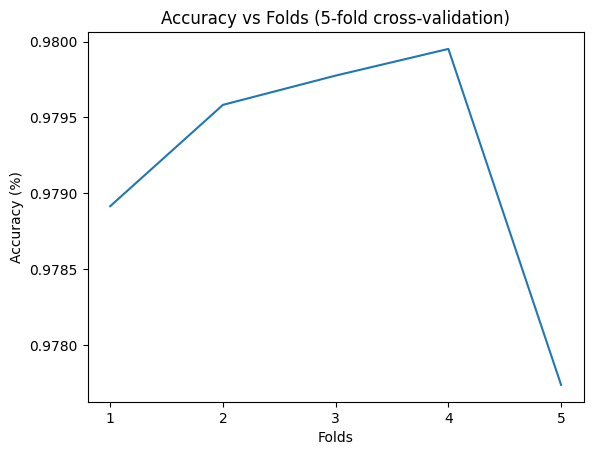

In [10]:
accuracies.clear()
# perform k-fold cross-validation
for fold, (trainIndex, testIndex) in enumerate(kf.split(X)):

    Xtrain, Xtest = X[trainIndex], X[testIndex]
    Ytrain, Ytest = Y[trainIndex], Y[testIndex]

    nb = NaiveBayes()
    nb.fit(Xtrain, Ytrain) # this calculate the optimised parameters for the prediction function

    predictions = nb.predict(Xtest)

    foldAccuracy = accuracy(Ytest, predictions)
    accuracies.append(foldAccuracy)
    print(f"\nFOLD {fold + 1} ACCURACY IS: {foldAccuracy}\n\n")

# print the average accuracy
print(f"AVERAGE ACCURACY ACCROSS ALL FOLDS: {np.mean(accuracies)}\n")

# plot average cost across all folds
plt.plot(np.arange(1, k + 1), accuracies)
plt.xlabel("Folds")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs Folds ({}-fold cross-validation)".format(k))

# set x-ticks to integers
plt.xticks(np.arange(1, k + 1, 1))
plt.show()